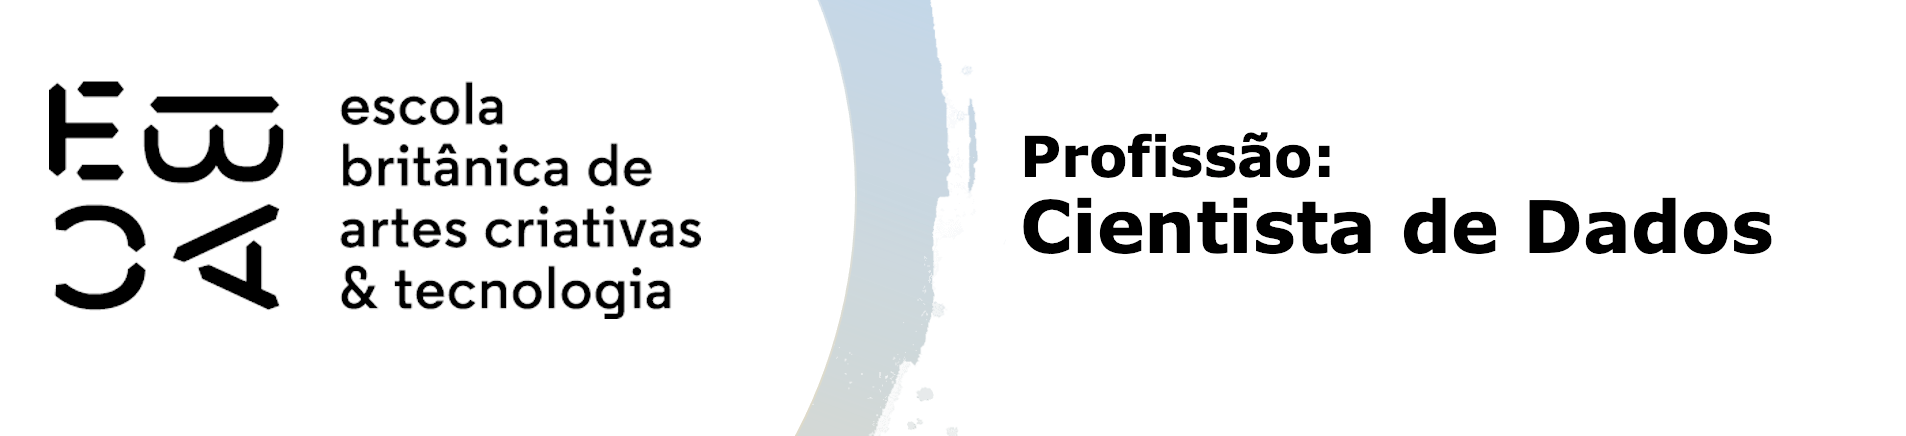

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings("ignore")

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
penguins = sns.load_dataset('penguins')

# Selecionando apenas as variáveis quantitativas
quant_vars = penguins.select_dtypes(include=['float', 'int'])
quant_vars.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [3]:
# tirando faltantes
quant_vars_1 = quant_vars.dropna()
quant_vars_1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [4]:
# padronizando
scaler = StandardScaler()
quant_vars_scaled = scaler.fit_transform(quant_vars_1)

In [5]:
# Agrupamento hierárquico com 3 grupos
cluster = AgglomerativeClustering(n_clusters=3)
labels = cluster.fit_predict(quant_vars_scaled)

# Adicionando os rótulos dos grupos ao dataframe original sem faltantes
quant_vars_1['cluster'] = labels
quant_vars_1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


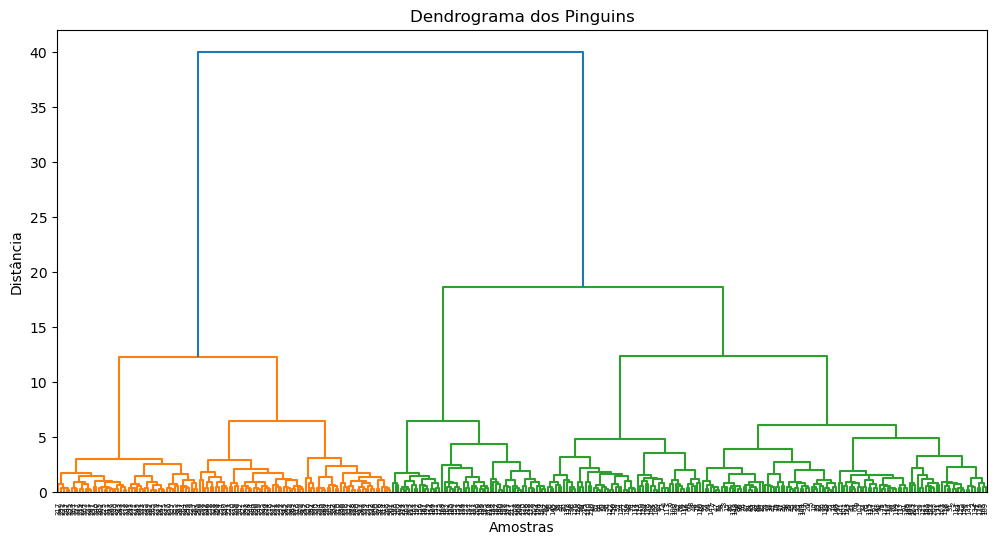

In [6]:
# plotando o dendograma
plt.figure(figsize=(12, 6))
shc.dendrogram(shc.linkage(quant_vars_scaled, method='ward'))
plt.title('Dendrograma dos Pinguins')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [7]:
# Adicionando a coluna 'species' ao dataframe quant_vars_1 para análise dos grupos
quant_vars_1['species'] = penguins.loc[quant_vars_1.index, 'species']

# Contando quantos pinguins de cada espécie há em cada grupo
especies_por_cluster = quant_vars_1.groupby(['cluster', 'species']).size().unstack(fill_value=0)
print(especies_por_cluster)

species  Adelie  Chinstrap  Gentoo
cluster                           
0           151         11       0
1             0          0     123
2             0         57       0


In [8]:
# Estatísticas descritivas das variáveis quantitativas por grupo
group_desc= quant_vars_1.groupby('cluster')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()
group_desc

bill_length_mm                                                      \
                 count       mean       std   min   25%   50%    75%   max   
cluster                                                                      
0                162.0  39.150000  2.936560  32.1  37.0  39.0  41.10  46.9   
1                123.0  47.504878  3.081857  40.9  45.3  47.3  49.55  59.6   
2                 57.0  49.752632  2.710107  45.2  47.5  50.2  51.30  58.0   

        bill_depth_mm             ... flipper_length_mm        body_mass_g  \
                count       mean  ...               75%    max       count   
cluster                           ...                                        
0               162.0  18.287654  ...            194.75  210.0       162.0   
1               123.0  14.982114  ...            221.00  231.0       123.0   
2                57.0  18.601754  ...            201.00  212.0        57.0   

                                                                            
                mean         std     min      25%     50%      75%     max  
cluster                                                                     
0        3675.771605  461.704434  2700.0  3331.25  3612.5  3968.75  4775.0  
1        5076.016260  504.116237  3950.0  4700.00  5000.0  5500.00  6300.0  
2        3810.087719  338.255096  3250.0  3600.00  3775.0  4000.00  4800.0  

[3 rows x 32 columns]

In [9]:
media_grupo = group_desc.xs('mean', axis=1, level=1)

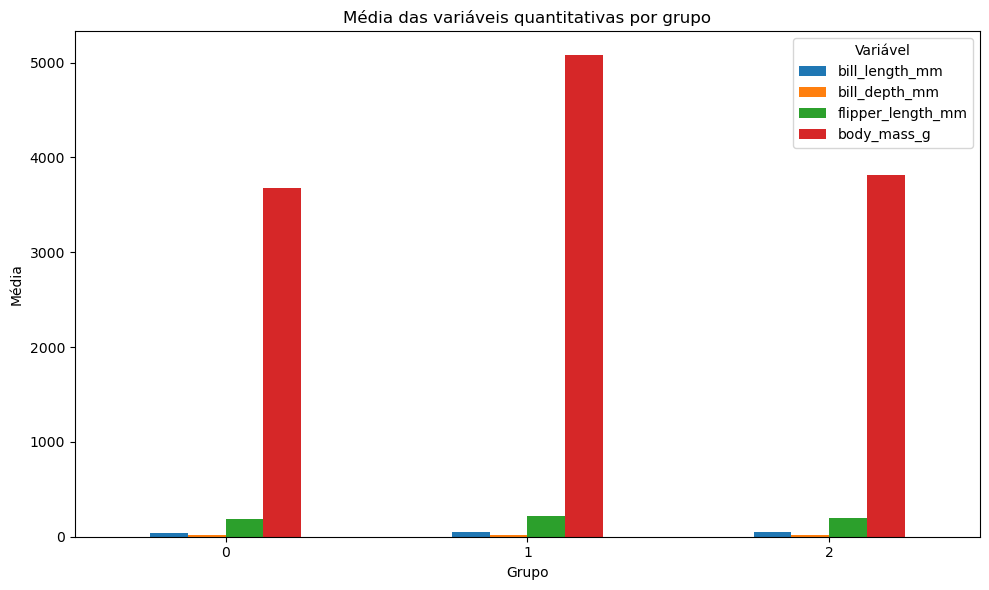

In [10]:
media_grupo.plot(kind='bar', figsize=(10,6))
plt.title('Média das variáveis quantitativas por grupo')
plt.ylabel('Média')
plt.xlabel('Grupo')
plt.xticks(rotation=0)
plt.legend(title='Variável')
plt.tight_layout()
plt.show()

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

- *Analisando o dendograma, podem existir entre 4 e 5 grupois interessantes*

In [11]:
# Agrupamento hierárquico com 5 grupos
cluster_5 = AgglomerativeClustering(n_clusters=5)
labels_5 = cluster_5.fit_predict(quant_vars_scaled)

# Adicionando os rótulos dos grupos
quant_vars_1['cluster_5'] = labels_5
quant_vars_1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster,species,cluster_5
0,39.1,18.7,181.0,3750.0,0,Adelie,1
1,39.5,17.4,186.0,3800.0,0,Adelie,1
2,40.3,18.0,195.0,3250.0,0,Adelie,1
4,36.7,19.3,193.0,3450.0,0,Adelie,1
5,39.3,20.6,190.0,3650.0,0,Adelie,3


In [12]:
# Agrupamento hierárquico com 4 grupos
cluster_4 = AgglomerativeClustering(n_clusters=4)
labels_4 = cluster_4.fit_predict(quant_vars_scaled)

# Adicionando os rótulos dos grupos
quant_vars_1['cluster_4'] = labels_4
quant_vars_1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster,species,cluster_5,cluster_4
0,39.1,18.7,181.0,3750.0,0,Adelie,1,1
1,39.5,17.4,186.0,3800.0,0,Adelie,1,1
2,40.3,18.0,195.0,3250.0,0,Adelie,1,1
4,36.7,19.3,193.0,3450.0,0,Adelie,1,1
5,39.3,20.6,190.0,3650.0,0,Adelie,3,3


In [13]:
# Quantos pinguins de cada espécie no grupo 4
especies_cluster_4 = quant_vars_1.groupby(['cluster_4', 'species']).size().unstack(fill_value=0)
print(especies_cluster_4)


species    Adelie  Chinstrap  Gentoo
cluster_4                           
0               0          0     123
1              97          8       0
2               0         57       0
3              54          3       0


In [14]:
# Quantos pinguins de cada espécie no grupo 5
especies_cluster_5 = quant_vars_1.groupby(['cluster_5', 'species']).size().unstack(fill_value=0)
print(especies_cluster_5)

species    Adelie  Chinstrap  Gentoo
cluster_5                           
0               0          0      71
1              97          8       0
2               0         57       0
3              54          3       0
4               0          0      52


In [15]:
# Quantos pinguins de cada sexo no grupo 4
sex_cluster_4 = quant_vars_1.groupby(['cluster_4', 'species', penguins.loc[quant_vars_1.index, 'sex']]).size().unstack(fill_value=0)
print(sex_cluster_4)

sex                  Female  Male
cluster_4 species                
0         Gentoo         58    61
1         Adelie         72    21
          Chinstrap       8     0
2         Chinstrap      23    34
3         Adelie          1    52
          Chinstrap       3     0


In [16]:
# Quantos pinguins de cada sexo no grupo 4
sex_cluster_5 = quant_vars_1.groupby(['cluster_5', 'species', penguins.loc[quant_vars_1.index, 'sex']]).size().unstack(fill_value=0)
print(sex_cluster_5)

sex                  Female  Male
cluster_5 species                
0         Gentoo          9    61
1         Adelie         72    21
          Chinstrap       8     0
2         Chinstrap      23    34
3         Adelie          1    52
          Chinstrap       3     0
4         Gentoo         49     0


- *Na minha opinião sim, o agrupamente hierarquico conseguiu capturar padroes nos dados dos pinguins. Quando analisamos as tabelas de frequencia por especie e sexo, é possivel ver qeu alguns clusters separam bem as especies. Por exemplo, um grupamento tem predominancia de Gentoo, outro de Adelie e outro de Chinstrap.*